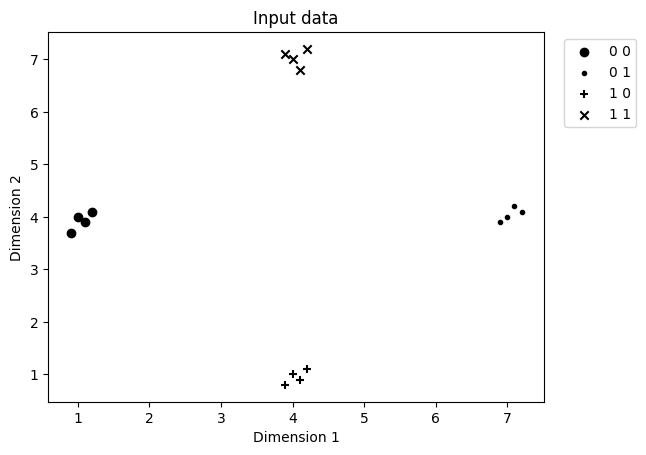

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl 
%matplotlib inline

def plot4(data, labels):
    plt.figure() 
    ind = labels[:,0] * 2 + labels[:,1]
    plots = []
    for i, m in enumerate(('o', '.', '+', 'x')):
        p = plt.scatter(data[ind==i,0], data[ind==i,1], marker=m, c='black')
        plots.append(p)
    plt.xlabel('Dimension 1') 
    plt.ylabel('Dimension 2') 
    plt.title('Input data') 
    plt.legend(plots, ['0 0', '0 1', '1 0', '1 1'], bbox_to_anchor=(1.2, 1))
    plt.show()

text = np.loadtxt('data_simple_nn.txt') 
data = text[:, 0:2] 
labels = text[:, 2:] 

plot4(data, labels)

Epoch: 20; Error: 1.1269366708780306;
Epoch: 40; Error: 1.0562756636456752;
Epoch: 60; Error: 0.3173025951290972;
Epoch: 80; Error: 0.11231814947098831;
Epoch: 100; Error: 0.06885259334778786;
Epoch: 120; Error: 0.04970935918584991;
Epoch: 140; Error: 0.0389493536234605;
Epoch: 160; Error: 0.03207196636660664;
Epoch: 180; Error: 0.027304600177841674;
Epoch: 200; Error: 0.023808076830578014;
Epoch: 220; Error: 0.021134662815612576;
Epoch: 240; Error: 0.019024200504034163;
Epoch: 260; Error: 0.017315446019403078;
Epoch: 280; Error: 0.01590325711444191;
Epoch: 300; Error: 0.01471619990692643;
Epoch: 320; Error: 0.01370406730929987;
Epoch: 340; Error: 0.012830550976145393;
Epoch: 360; Error: 0.012068748144239368;
Epoch: 380; Error: 0.011398303319413688;
Epoch: 400; Error: 0.010803531448560137;
Epoch: 420; Error: 0.010272151138350283;
The goal of learning is reached


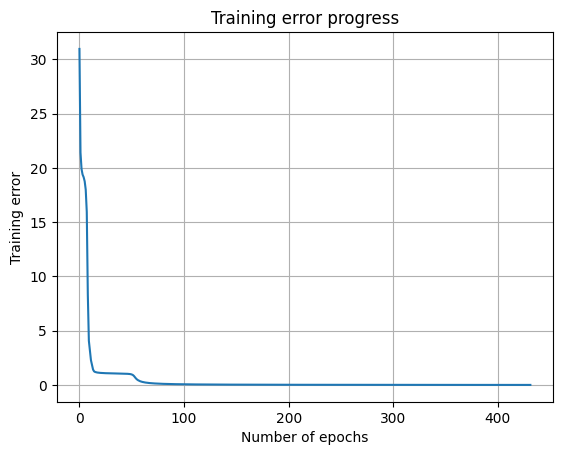

In [8]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max() 
dim2_min, dim2_max = data[:,1].min(), data[:,1].max() 
dim1 = [dim1_min, dim1_max] 
dim2 = [dim2_min, dim2_max] 
num_output = 2

# Single layer (2 neurons)
# nn = nl.net.newp([dim1, dim2], num_output) 

# Hidden Layer
nn = nl.net.newff([dim1, dim2], [8, num_output]) 
nn.trainf = nl.train.train_gd 

error_progress = nn.train(data, labels, epochs=1000, show=20, lr=0.03) 

plt.figure() 
plt.plot(error_progress) 
plt.xlabel('Number of epochs') 
plt.ylabel('Training error') 
plt.title('Training error progress') 
plt.grid() 
plt.show() 

In [9]:
print('Test results:') 
data_test = [[0.4, 4.3], [4.4, 0.6], [4.7, 8.1]] 
for item in data_test: 
    print(item, '-->', nn.sim([item])[0])   

Test results:
[0.4, 4.3] --> [-0.0243553  -0.02672283]
[4.4, 0.6] --> [ 0.97306074 -0.15827205]
[4.7, 8.1] --> [0.96046812 0.98939321]


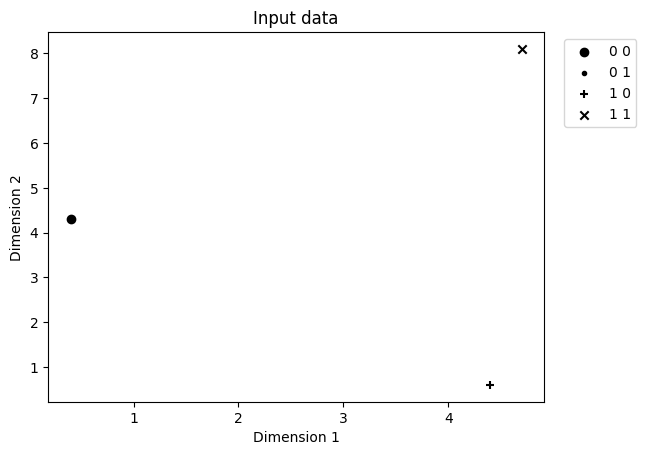

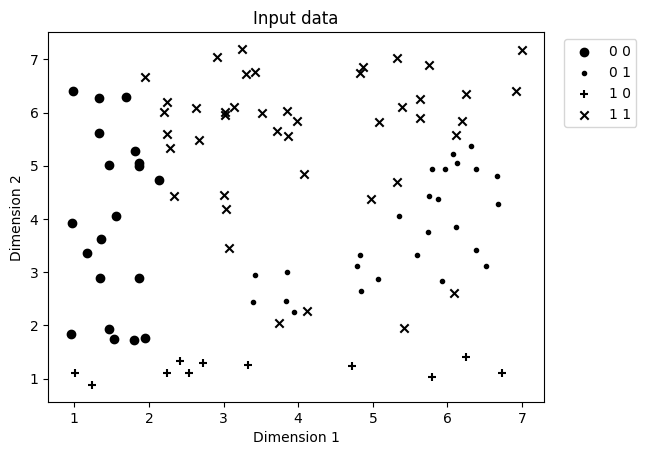

In [10]:
xy = np.array(data_test)
out = np.where(nn.sim(xy) < 0.5, 0, 1)
plot4(xy, out)

x = np.random.rand(100) * (dim1_max - dim1_min) + dim1_min
y = np.random.rand(100) * (dim2_max - dim2_min) + dim2_min
xy = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
out = np.where(nn.sim(xy) < 0.5, 0, 1)
plot4(xy, out)